<a href="https://colab.research.google.com/github/gibi177/NOIA/blob/main/Reconhecimento_de_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de digital

## Trabalho final da disciplina Noções de Inteligência Artificial - 2/2024
## Alunos: Felipe Lopes Gibin Duarte (231025207) e Matheus das Neves Fernandes (231013672)


## Introdução

O reconhecimento de digitais é uma tecnologia essencial no mundo contemporâneo, sendo amplamente utilizada em aplicações como o desbloqueio de dispositivos móveis e o controle de acesso a informações confidenciais. Neste trabalho, resolveremos o problema de reconhecimento de digitais desenvolvendo uma rede neural capaz de distinguir digitais reais de falsificadas, utilizando o dataset FVC2000 DB4. Para isso, será aplicada a técnica do transfer learning com a arquitetura da ResNet50. Visamos demonstrar a versatilidade e aplicabilidade de redes neurais na tarefa de reconhecimento de imagens.

## 1. Preparação do ambiente

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from tensorflow.keras.optimizers import Adam
from collections import defaultdict
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/peace1019/fingerprint-dataset-for-fvc2000-db4-b/data")

Skipping, found downloaded files in "./fingerprint-dataset-for-fvc2000-db4-b" (use force=True to force download)


In [27]:
#Caminho dos diretórios real_data e train_data
train_data_path = "/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data"
real_data_path = "/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/real_data"

In [25]:
import os
import shutil

# Caminho do diretório de treino
train_data_path = "/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data"

# Caminho de destino dentro de train_data_path
output_dir = train_data_path

# Listar todos os arquivos no diretório train_data
for file_name in os.listdir(train_data_path):
    if file_name.endswith('.bmp'):
        # Extraímos a identificação da pessoa (primeiros 5 caracteres do nome do arquivo)
        person_id = file_name[:5]

        # Cria o diretório para a pessoa, se não existir
        person_dir = os.path.join(output_dir, person_id)
        if not os.path.exists(person_dir):
            os.makedirs(person_dir)

        # Caminho completo do arquivo original
        src_file = os.path.join(train_data_path, file_name)

        # Caminho completo de destino
        dst_file = os.path.join(person_dir, file_name)

        # Move o arquivo para o diretório correto
        shutil.move(src_file, dst_file)

print("Reorganização concluída!")


Reorganização concluída!


Caminhos das primeiras 5 digitais:
['/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data/00000/00000_52.bmp', '/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data/00000/00000_65.bmp', '/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data/00000/00000_74.bmp', '/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data/00000/00000_63.bmp', '/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data/00000/00000_27.bmp']


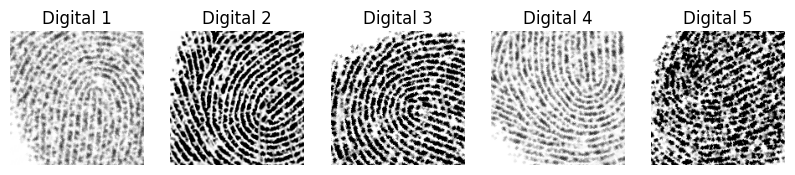

In [30]:
# Caminho para as digitais da pessoa com id 00000
person_0_path = "/content/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data/00000"

# Listar todas as imagens no diretório
person_0_digitals = [os.path.join(person_0_path, img) for img in os.listdir(person_0_path) if img.endswith(".bmp")]

# Exibir os caminhos das primeiras 3 digitais da pessoa 0
print("Caminhos das primeiras 5 digitais:")
print(person_0_digitals[:5])

# Função para exibir as imagens
def show_images(image_paths, num_images=3):
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(image_paths[:num_images]):
        img = image.load_img(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Digital {i + 1}")
        plt.axis('off')
    plt.show()

# Exibir as primeiras 5 digitais
show_images(person_0_digitals, num_images=5)